# To test out wide to long in pandas

- Read the data from HandBookData.xlsx
- read only the required cells [A1:AB1827]
- change from wide to long using pandas functionality.
- Use the statistics obtained from test1 notebook
- Write a model using SVR using multiple variables.
- Look for a way to tune the model

In [33]:
import pandas as pd
import numpy as np
import openpyxl
from datetime import datetime, timedelta
from os.path import join, splitext

In [34]:
data = pd.read_excel('HandBookData.xlsx', sheet_name='DPLLoad', engine='openpyxl', usecols='A:AB', nrows=1826)

data.sample(5)

,Season,Month,DOW,DT,HR1,HR2,HR3,HR4,HR5,HR6,...,HR15,HR16,HR17,HR18,HR19,HR20,HR21,HR22,HR23,HR24
90,Spring,4,Monday,2013-04-01,1524,1495.0,1491.0,1508,1564,1702,...,2066,2004,1976,1977,1978,2019,2136,2125,2026,1908
528,Summer,6,Friday,2014-06-13,1752,1655.0,1584.0,1553,1562,1634,...,2127,2120,2119,2100,2044,1975,1882,1878,1780,1616
709,Winter,12,Thursday,2014-12-11,2020,1969.0,1931.0,1938,1996,2143,...,2227,2199,2224,2396,2476,2460,2441,2385,2255,2117
972,Summer,8,Monday,2015-08-31,1791,1693.0,1635.0,1611,1645,1765,...,2933,2978,3002,2967,2872,2763,2747,2635,2407,2162
1302,Summer,7,Tuesday,2016-07-26,2425,2281.0,2153.0,2082,2051,2125,...,2944,2876,2853,2883,2882,2832,2778,2745,2577,2368


In [35]:
data.head()

,Season,Month,DOW,DT,HR1,HR2,HR3,HR4,HR5,HR6,...,HR15,HR16,HR17,HR18,HR19,HR20,HR21,HR22,HR23,HR24
0,Winter,1,Tuesday,2013-01-01,1723,1674.0,1622.0,1595,1591,1629,...,1900,1906,1934,2089,2184,2173,2149,2084,2005,1934
1,Winter,1,Wednesday,2013-01-02,1874,1846.0,1851.0,1865,1921,2067,...,2307,2285,2307,2468,2564,2555,2507,2443,2323,2204
2,Winter,1,Thursday,2013-01-03,2141,2105.0,2076.0,2094,2133,2254,...,2314,2287,2305,2444,2527,2489,2439,2350,2227,2087
3,Winter,1,Friday,2013-01-04,1989,1942.0,1897.0,1907,1955,2086,...,2225,2188,2204,2325,2435,2404,2366,2293,2185,2060
4,Winter,1,Saturday,2013-01-05,1961,1914.0,1879.0,1880,1897,1967,...,1944,1961,2005,2104,2169,2125,2086,2017,1931,1825


In [36]:
long_data = pd.wide_to_long(data, stubnames='HR', i=['Season','Month','DT','DOW'], j='hour')

long_data.sample(5)

,,,,,HR
Season,Month,DT,DOW,hour,
Summer,6,2014-06-17,Tuesday,10,2444.0
Winter,2,2016-02-12,Friday,17,2424.0
Spring,4,2016-04-12,Tuesday,22,2006.0
Winter,1,2013-01-07,Monday,7,2277.0
Spring,5,2013-05-03,Friday,18,1943.0


In [37]:
long_data.reset_index(inplace=True)

long_data.sample(5)

,Season,Month,DT,DOW,hour,HR
9619,Winter,2,2014-02-05,Wednesday,20,2638.0
29610,Spring,5,2016-05-18,Wednesday,19,1878.0
14507,Summer,8,2014-08-28,Thursday,12,2476.0
35398,Winter,1,2017-01-14,Saturday,23,1926.0
20105,Spring,4,2015-04-18,Saturday,18,1681.0


Lets make some plots
- data from 2017 during seasons at hour 1

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.constants import golden as phi

<AxesSubplot:xlabel='hour', ylabel='HR'>

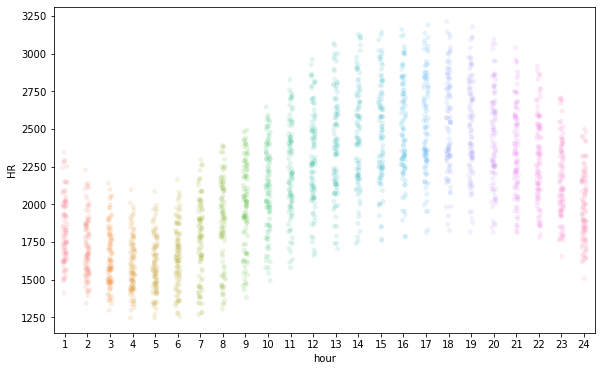

In [39]:
data = long_data.loc[(long_data['DT'].dt.year == 2017) & (long_data['Season'] == 'Summer')]

height = 6
fig = plt.figure(figsize=(phi * height,height))
sns.stripplot(data = data, x='hour', y='HR',alpha=0.15)

- Turn values into categorical

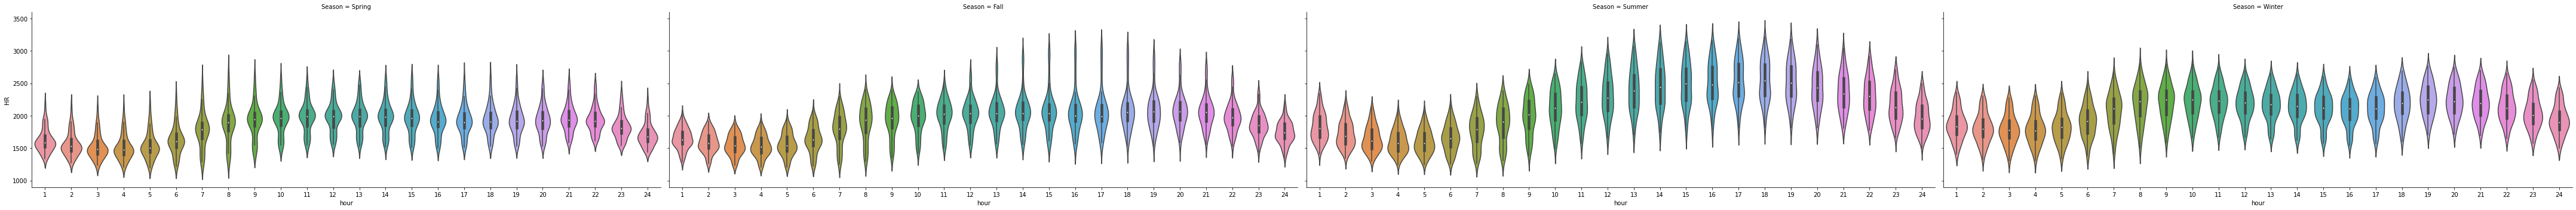

In [40]:
data = long_data.loc[(long_data['DT'].dt.year == 2017)]

sns.catplot(data = data, x='hour', y='HR',alpha=0.15, col='Season', kind='violin', aspect=3, col_order=['Spring','Fall','Summer','Winter'])

**2017 Sesonal trend**

We can see that in 2017 Spring and Fall have quite consistent points, they are clustered close to each other. On the other hand Summer and Winter data is quite scattered. 

In [41]:
data = long_data.copy(deep=True)

data['year'] = data['DT'].dt.year

# sns.catplot(data = data, x='hour', y='HR',alpha=0.15, col='Season', row='year', kind='violin', aspect=3, col_order=['Spring','Fall','Summer','Winter'])

We can see that for all the years the hourly load in spring and fall is quite consistent over all the days while just like 2017, the hourly load in summer and winter is quite spread out.

In [42]:
long_data['Season'] = long_data['Season'].astype('category')

In [43]:
labels = ['Night', 'Day', 'Day','Night']

long_data['TimeOfDay'] = pd.cut(long_data['hour'].values, bins=range(0,25,6), right=True, labels = labels, ordered=False)

long_data.sample(5)

,Season,Month,DT,DOW,hour,HR,TimeOfDay
24587,Fall,10,2015-10-22,Thursday,12,2013.0,Day
23609,Fall,9,2015-09-11,Friday,18,2007.0,Day
22337,Summer,7,2015-07-20,Monday,18,3016.0,Day
25237,Fall,11,2015-11-18,Wednesday,14,2004.0,Day
10973,Spring,4,2014-04-03,Thursday,6,1659.0,Night


In [44]:
long_data['Season']

0        Winter
1        Winter
2        Winter
3        Winter
4        Winter
          ...  
43819    Winter
43820    Winter
43821    Winter
43822    Winter
43823    Winter
Name: Season, Length: 43824, dtype: category
Categories (4, object): ['Fall', 'Spring', 'Summer', 'Winter']

In [45]:
weather_data = pd.read_excel('HandBookData.xlsx', sheet_name='DPLWeather', engine='openpyxl')

weather_data.sample(5)

,dt,MaxTemp,AvgTemp,LowTemp,MaxDewPoint,AvgDepPoint,LowDewPoint,MaxRelHumidity,AvgRelHumidity,LowHumidity,...,AvgPressure,LowPressure,MaxVisibility,AvgVisibility,LowVisibility,MaxWindSpeed,AvgWindSpeed,MaxGust,Precipitation,EventCategory
289,2013-10-17,54,48,41,48,44,39,96,87,77,...,29.93,29.87,10,9,3,20,7,25,0.11,11.0
985,2015-09-13,69,59,49,50,45,39,100,69,37,...,30.03,29.97,10,10,10,17,9,21,0,99.0
475,2014-04-21,77,64,50,54,44,34,72,53,33,...,29.98,29.86,10,10,10,20,7,23,T,11.0
511,2014-05-27,88,78,68,66,63,56,87,61,35,...,29.97,29.90,10,9,5,22,10,40,0,99.0
17,2013-01-18,37,28,18,23,17,13,84,62,40,...,30.41,30.21,10,10,10,23,12,32,0,99.0


In [46]:
complete_data = long_data.set_index('DT').join(weather_data.set_index('dt'))

complete_data.reset_index(inplace=True)
complete_data.sample(5)

,index,Season,Month,DOW,hour,HR,TimeOfDay,MaxTemp,AvgTemp,LowTemp,...,AvgPressure,LowPressure,MaxVisibility,AvgVisibility,LowVisibility,MaxWindSpeed,AvgWindSpeed,MaxGust,Precipitation,EventCategory
40976,2017-09-04,Fall,9,Monday,9,1384.0,Day,84,72,60,...,29.90,29.74,10,7,0,31,14,49,0.25,7.0
9909,2014-02-17,Winter,2,Monday,22,2416.0,Night,35,24,12,...,29.96,29.67,9,5,1,37,18,46,0.38,13.0
13935,2014-08-04,Summer,8,Monday,16,2724.0,Day,87,74,60,...,30.11,30.07,10,9,2,22,4,25,0.48,11.0
4530,2013-07-08,Summer,7,Monday,19,2735.0,Night,85,78,70,...,30.09,30.05,10,9,5,16,10,29,0.12,15.0
9511,2014-02-01,Winter,2,Saturday,8,2005.0,Day,47,40,33,...,29.96,29.85,10,7,0,20,9,25,0.13,2.0


In [47]:
complete_data['HR'] = complete_data['HR'].fillna(method='ffill')

In [48]:
data = complete_data.loc[complete_data['index'].dt.year == 2017]

data.tail()

,index,Season,Month,DOW,hour,HR,TimeOfDay,MaxTemp,AvgTemp,LowTemp,...,AvgPressure,LowPressure,MaxVisibility,AvgVisibility,LowVisibility,MaxWindSpeed,AvgWindSpeed,MaxGust,Precipitation,EventCategory
43819,2017-12-31,Winter,12,Sunday,20,2484.0,Night,11,3,-5,...,30.5,30.41,10,7,1,10,6,12,0.05,NaN
43820,2017-12-31,Winter,12,Sunday,21,2452.0,Night,11,3,-5,...,30.5,30.41,10,7,1,10,6,12,0.05,NaN
43821,2017-12-31,Winter,12,Sunday,22,2421.0,Night,11,3,-5,...,30.5,30.41,10,7,1,10,6,12,0.05,NaN
43822,2017-12-31,Winter,12,Sunday,23,2375.0,Night,11,3,-5,...,30.5,30.41,10,7,1,10,6,12,0.05,NaN
43823,2017-12-31,Winter,12,Sunday,24,2345.0,Night,11,3,-5,...,30.5,30.41,10,7,1,10,6,12,0.05,NaN


<AxesSubplot:xlabel='index', ylabel='MaxTemp'>

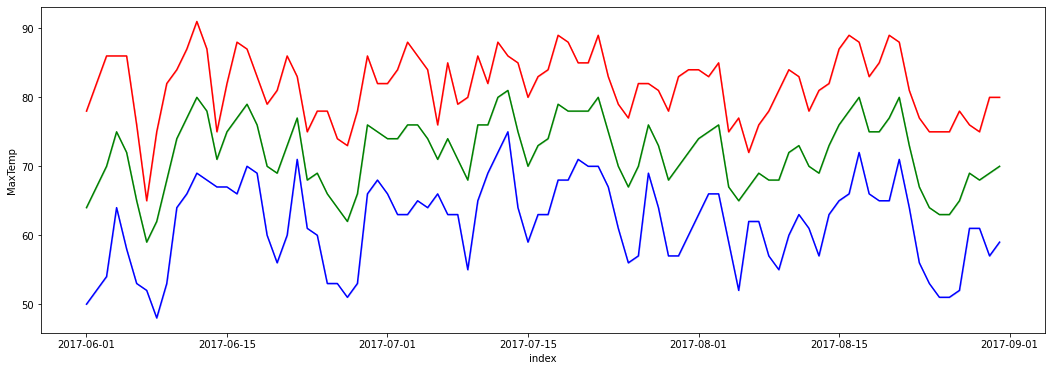

In [49]:
data = complete_data.loc[(complete_data['index'].dt.year == 2017) & (complete_data['Season'] == 'Summer')]
fig = plt.figure(figsize=(6*3, 6))
sns.lineplot(data=data, x='index', y='MaxTemp', color='r')
sns.lineplot(data=data, x='index', y='LowTemp', color='b')
sns.lineplot(data=data, x='index', y='AvgTemp', color='g')
# sns.relplot(data=data, x='index', y='MaxTemp','LowTemp', kind='line', aspect=3)

In [50]:
data = complete_data.copy(deep=True)
data['MaxGustNew'] = data['MaxGust'].replace('-', '0', regex=False)

# data.loc[data['MaxGustNew'].notna()]
complete_data['MaxGust'] = data['MaxGustNew']
complete_data['MaxGust'] = complete_data['MaxGust'].astype(np.float64)

In [51]:
complete_data['EventCategory'] = complete_data['EventCategory'].fillna('99')
complete_data['EventCategory'] = complete_data['EventCategory'].astype('category')
complete_data['DOW'] = complete_data['DOW'].astype('category')
complete_data['Month'] = complete_data['Month'].astype('category')
complete_data['hour'] = complete_data['hour'].astype('category')

In [52]:
complete_data['Precipitation'] = complete_data['Precipitation'].replace('T', '99', regex=False)
complete_data['Precipitation'] = complete_data['Precipitation'].astype(np.float64)

In [53]:
complete_data['Weekend'] = np.where((complete_data['DOW'] == 'Saturday') | (complete_data['DOW'] == 'Sunday'), 1, 0)

complete_data.sample(10)

,index,Season,Month,DOW,hour,HR,TimeOfDay,MaxTemp,AvgTemp,LowTemp,...,LowPressure,MaxVisibility,AvgVisibility,LowVisibility,MaxWindSpeed,AvgWindSpeed,MaxGust,Precipitation,EventCategory,Weekend
9209,2014-01-19,Winter,1,Sunday,18,2149.0,Day,33,27,21,...,29.72,10,9,4,30,16,38.0,99.00,16.0,1
34349,2016-12-02,Winter,12,Friday,6,1923.0,Night,39,37,34,...,30.07,10,10,8,20,11,25.0,99.00,11.0,0
6479,2013-09-27,Fall,9,Friday,24,1597.0,Night,81,65,48,...,30.11,10,10,10,8,3,10.0,0.00,99.0,0
19849,2015-04-08,Spring,4,Wednesday,2,1507.0,Night,71,60,49,...,29.92,10,5,0,39,8,47.0,1.22,7.0,0
13275,2014-07-08,Summer,7,Tuesday,4,1667.0,Night,83,76,69,...,29.72,10,8,1,25,15,44.0,0.27,15.0,0
39370,2017-06-29,Summer,6,Thursday,11,2339.0,Day,86,76,66,...,29.91,10,10,10,28,16,35.0,0.00,99.0,0
39373,2017-06-29,Summer,6,Thursday,14,2676.0,Day,86,76,66,...,29.91,10,10,10,28,16,35.0,0.00,99.0,0
13020,2014-06-27,Summer,6,Friday,13,2704.0,Day,87,77,66,...,30.04,10,9,5,12,4,26.0,0.00,99.0,0
20575,2015-05-08,Spring,5,Friday,8,1933.0,Day,86,75,64,...,29.99,10,10,7,21,8,25.0,0.00,99.0,0
29113,2016-04-28,Spring,4,Thursday,2,1493.0,Night,68,59,50,...,29.81,10,7,4,18,6,21.0,0.16,15.0,0


In [54]:
complete_data.rename(columns = {'HR':'load', 'index': 'date'}, inplace = True)
complete_data.dtypes

date              datetime64[ns]
Season                  category
Month                   category
DOW                     category
hour                    category
load                     float64
TimeOfDay               category
MaxTemp                    int64
AvgTemp                    int64
LowTemp                    int64
MaxDewPoint                int64
AvgDepPoint                int64
LowDewPoint                int64
MaxRelHumidity             int64
AvgRelHumidity             int64
LowHumidity                int64
MaxPressure              float64
AvgPressure              float64
LowPressure              float64
MaxVisibility              int64
AvgVisibility              int64
LowVisibility              int64
MaxWindSpeed               int64
AvgWindSpeed               int64
MaxGust                  float64
Precipitation            float64
EventCategory           category
Weekend                    int64
dtype: object

In [55]:
complete_data = complete_data.dropna()

In [56]:
# Let's just take a minimalistic number of fields for a simple model

data = complete_data[['date','Month','DOW','hour','load','AvgTemp', 'Weekend']]
data.dtypes

date       datetime64[ns]
Month            category
DOW              category
hour             category
load              float64
AvgTemp             int64
Weekend             int64
dtype: object

<AxesSubplot:xlabel='AvgTemp', ylabel='load'>

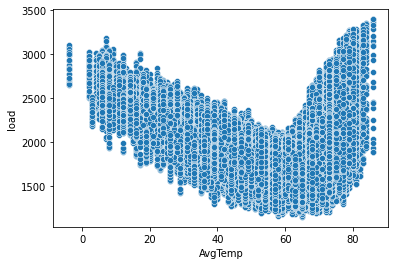

In [57]:
sns.scatterplot(data = data, x='AvgTemp',y='load')

<AxesSubplot:xlabel='AvgTemp', ylabel='load'>

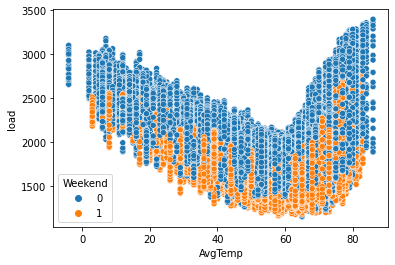

In [58]:
sns.scatterplot(data=data, x='AvgTemp', y='load', hue='Weekend')

In [59]:
# Let's add polynomial values for avgTemp
data['AvgTemp2'] = data.loc[:,'AvgTemp'].apply(lambda x: x**2)
data['AvgTemp3'] = data.loc[:,'AvgTemp'].apply(lambda x: x**3)
data['AvgTemp_weekend'] = data.loc[:,('AvgTemp', 'Weekend')].apply(lambda x: x['AvgTemp'] * x['Weekend'], axis=1)
data['AvgTemp2_weekend'] = data.loc[:,('AvgTemp2', 'Weekend')].apply(lambda x: x['AvgTemp2'] * x['Weekend'], axis=1)
data['AvgTemp3_weekend'] = data.loc[:,('AvgTemp3', 'Weekend')].apply(lambda x: x['AvgTemp3'] * x['Weekend'], axis=1)

/tmp/ipykernel_8662/331757403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AvgTemp2'] = data.loc[:,'AvgTemp'].apply(lambda x: x**2)
/tmp/ipykernel_8662/331757403.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AvgTemp3'] = data.loc[:,'AvgTemp'].apply(lambda x: x**3)
/tmp/ipykernel_8662/331757403.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [60]:
ohe_values = pd.get_dummies(data[['Month','DOW']])
t_d = data.drop(['Month','DOW'], axis=1)
data = pd.concat((t_d, ohe_values), axis=1)

data.sample(5)

,date,hour,load,AvgTemp,Weekend,AvgTemp2,AvgTemp3,AvgTemp_weekend,AvgTemp2_weekend,AvgTemp3_weekend,...,Month_10,Month_11,Month_12,DOW_Friday,DOW_Monday,DOW_Saturday,DOW_Sunday,DOW_Thursday,DOW_Tuesday,DOW_Wednesday
21401,2015-06-11,18,2974.0,80,0,6400,512000,0,0,0,...,0,0,0,0,0,0,0,1,0,0
42342,2017-10-31,7,2123.0,38,0,1444,54872,0,0,0,...,1,0,0,0,0,0,0,0,1,0
37898,2017-04-29,3,1327.0,64,1,4096,262144,64,4096,262144,...,0,0,0,0,0,1,0,0,0,0
8321,2013-12-13,18,2435.0,26,0,676,17576,0,0,0,...,0,0,1,1,0,0,0,0,0,0
18033,2015-01-22,10,2371.0,34,0,1156,39304,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [61]:
# Let's make 24 data arrays to create 24 equations (one for each hour)
datas = []
for i in range(1,25):
    datas.append(data.loc[data['hour'] == i])
    
datas[0].head()
                          

,date,hour,load,AvgTemp,Weekend,AvgTemp2,AvgTemp3,AvgTemp_weekend,AvgTemp2_weekend,AvgTemp3_weekend,...,Month_10,Month_11,Month_12,DOW_Friday,DOW_Monday,DOW_Saturday,DOW_Sunday,DOW_Thursday,DOW_Tuesday,DOW_Wednesday
0,2013-01-01,1,1723.0,26,0,676,17576,0,0,0,...,0,0,0,0,0,0,0,0,1,0
24,2013-01-02,1,1874.0,16,0,256,4096,0,0,0,...,0,0,0,0,0,0,0,0,0,1
48,2013-01-03,1,2141.0,20,0,400,8000,0,0,0,...,0,0,0,0,0,0,0,1,0,0
72,2013-01-04,1,1989.0,24,0,576,13824,0,0,0,...,0,0,0,1,0,0,0,0,0,0
96,2013-01-05,1,1961.0,28,1,784,21952,28,784,21952,...,0,0,0,0,0,1,0,0,0,0


In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

models = []
output_data = pd.DataFrame(columns=['prediction','actual','date'])
predictions = pd.Series(dtype='float')
actuals = pd.Series(dtype='float')
dates = pd.Series(dtype='datetime64[ns]')

for i, d in enumerate(datas):
    model = RandomForestRegressor()
    x_data = d.drop(['load', 'hour'], axis=1)
    y_data = d['load']
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, random_state=1, shuffle=False)
    model.fit(x_train.drop(['date'], axis=1), y_train)
    
    # Predictions
    pred = pd.Series(model.predict(x_test.drop(['date'], axis=1)), index=y_test.index)
    # output_data['prediction'] = pd.concat((output_data['prediction'], pred), axis=0)
    # output_data['prediction'] = pred
    # output_data['actual'] = y_test
    # output_data['date'] = x_test['date']
    predictions = pd.concat((predictions, pred), axis=0)
    actuals = pd.concat((actuals, y_test), axis=0)
    temp_dates = x_test['date'].apply(lambda x: x + np.timedelta64(i+1, 'h'))
    dates = pd.concat((dates, temp_dates), axis=0)
    models.append(model)
    
output_data['date'] = dates
output_data['actual'] = actuals
output_data['prediction'] = predictions
output_data = output_data.sort_index()

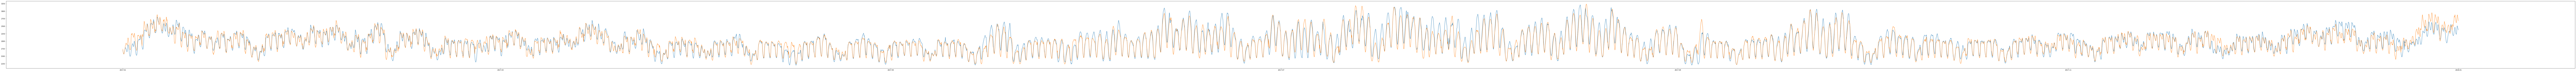

In [104]:
fig = plt.figure(figsize=(300,8))
temp_data = output_data.loc[output_data['date'].dt.year == 2017]
plt.plot(temp_data['date'], temp_data['actual'])
plt.plot(temp_data['date'], temp_data['prediction'])

In [101]:
from sklearn.metrics import r2_score
r2_score(actuals, predictions)

0.8568409513046837

In [98]:
output_data

,prediction,actual,date
32856,1483.516000,1443.0,2016-10-01 01:00:00
32857,1410.422500,1369.0,2016-10-01 02:00:00
32858,1370.756500,1326.0,2016-10-01 03:00:00
32859,1344.708214,1309.0,2016-10-01 04:00:00
32860,1340.490833,1308.0,2016-10-01 05:00:00
...,...,...,...
43819,2876.880000,2484.0,2017-12-31 20:00:00
43820,2812.800000,2452.0,2017-12-31 21:00:00
43821,2764.560000,2421.0,2017-12-31 22:00:00
43822,2680.610000,2375.0,2017-12-31 23:00:00


In [33]:
# Use StandardScaler to scale the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

final_norm_datas = []
norms = {
    'load': [],
    'temp': []
}


for i, d in enumerate(datas):
    train_datas, test_datas = train_test_split(d, random_state=1)
    
    load_norm = StandardScaler()
    load_norm.fit(train_datas['load'].values.reshape(-1, 1))
    load_d = load_norm.transform(d['load'].values.reshape(-1,1))
    load_d = pd.DataFrame(load_d, columns=['load_norm'], index = range(i,43801+i, 24))
    
    temp_norm = StandardScaler()
    temp_norm.fit(train_datas['AvgTemp'].values.reshape(-1, 1))
    temp_d = temp_norm.transform(d['AvgTemp'].values.reshape(-1,1))
    temp_d = pd.DataFrame(temp_d, columns=['temp_norm'], index = range(i,43801+i, 24))
    
    t_d = d.drop(['load','AvgTemp'], axis=1)
    
    final_norm_datas.append(pd.concat((load_d, temp_d, t_d), axis=1))
    norms['load'].append(load_norm)
    norms['temp'].append(temp_norm)

final_norm_datas[1]
    

,load_norm,temp_norm,hour,Weekend,AvgTemp2,AvgTemp3,AvgTemp_weekend,AvgTemp2_weekend,AvgTemp3_weekend,Month_1,...,Month_10,Month_11,Month_12,DOW_Friday,DOW_Monday,DOW_Saturday,DOW_Sunday,DOW_Thursday,DOW_Tuesday,DOW_Wednesday
1,-0.069826,-1.441126,2,0,676,17576,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
25,0.622957,-1.962175,2,0,256,4096,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
49,1.666159,-1.753755,2,0,400,8000,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
73,1.009626,-1.545335,2,0,576,13824,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
97,0.896847,-1.336916,2,1,784,21952,28,784,21952,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43705,1.911855,-2.483224,2,0,36,216,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
43729,2.221996,-2.326909,2,0,81,729,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
43753,1.569491,-1.962175,2,0,256,4096,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
43777,1.182822,-2.379014,2,1,64,512,8,64,512,0,...,0,0,1,0,0,1,0,0,0,0


In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# model = make_pipeline(PolynomialFeatures(degree=3, include_bias=False), LinearRegression(fit_intercept = False))


models = []
predictions = pd.DataFrame()
actuals = pd.DataFrame()

for i, d in enumerate(final_norm_datas):
    model = make_pipeline(PolynomialFeatures(degree=3, include_bias=False), LinearRegression(fit_intercept = False))
    x_data = d.drop(['load_norm', 'hour', 'AvgTemp2','AvgTemp3','AvgTemp_weekend','AvgTemp2_weekend','AvgTemp3_weekend'], axis=1)
    y_data = d['load_norm']
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, random_state=1, shuffle=False)
    model.fit(x_train, y_train)
    
    # Predictions
    pred = pd.DataFrame(model.predict(x_test), index=y_test.index)
    predictions = pd.concat((predictions, pred), axis=0)
    actuals = pd.concat((actuals, y_test), axis=0)
    models.append(model)
    


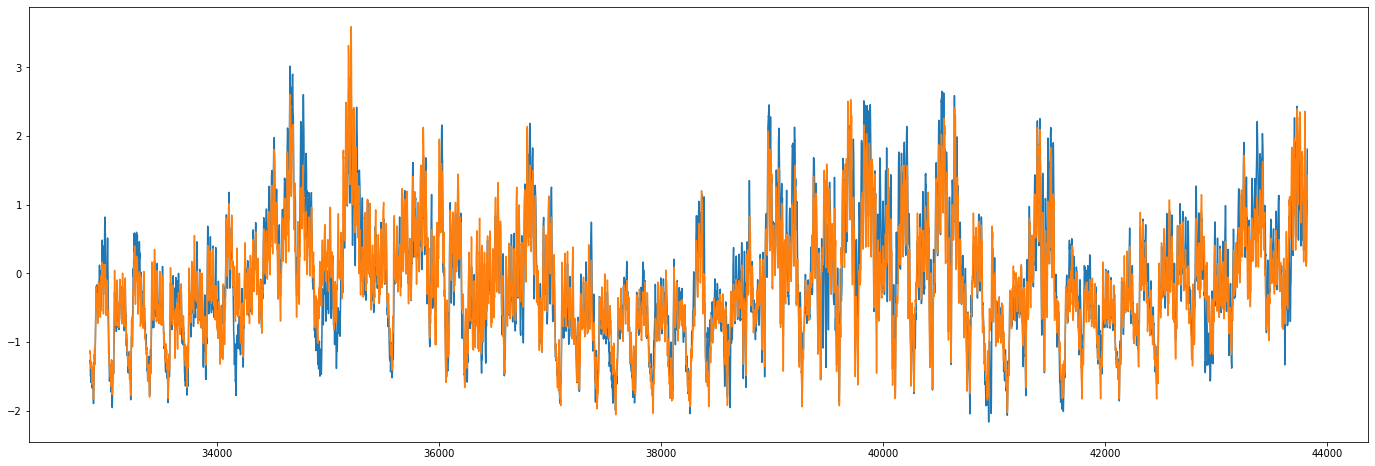

In [35]:
fig = plt.figure(figsize=(24,8))
plt.plot(actuals.sort_index())
plt.plot(predictions.sort_index())

In [36]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2_score(actuals, predictions), mean_squared_error(actuals, predictions), mean_absolute_error(actuals, predictions)

(0.8257831715024845, 0.13964035925975063, 0.2711416646744366)

In [37]:
final_norm_data = pd.DataFrame()

for d in final_norm_datas:
    final_norm_data = pd.concat((final_norm_data,d), axis=0)

final_norm_data.sort_index()

,load_norm,temp_norm,hour,Weekend,AvgTemp2,AvgTemp3,AvgTemp_weekend,AvgTemp2_weekend,AvgTemp3_weekend,Month_1,...,Month_10,Month_11,Month_12,DOW_Friday,DOW_Monday,DOW_Saturday,DOW_Sunday,DOW_Thursday,DOW_Tuesday,DOW_Wednesday
0,-0.159889,-1.441126,1,0,676,17576,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,-0.069826,-1.441126,2,0,676,17576,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,-0.098356,-1.441126,3,0,676,17576,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,-0.128941,-1.441126,4,0,676,17576,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,-0.217240,-1.441126,5,0,676,17576,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,0.814036,-2.639539,20,1,9,27,3,9,27,0,...,0,0,1,0,0,0,1,0,0,0
43820,0.855173,-2.639539,21,1,9,27,3,9,27,0,...,0,0,1,0,0,0,1,0,0,0
43821,0.957993,-2.639539,22,1,9,27,3,9,27,0,...,0,0,1,0,0,0,1,0,0,0
43822,1.300114,-2.639539,23,1,9,27,3,9,27,0,...,0,0,1,0,0,0,1,0,0,0


In [38]:
plotting_data = pd.concat((final_norm_data, predictions.sort_index()), axis=1).sort_index().dropna()[['load_norm','hour',0]].rename({0: 'prediction'}, axis=1)
plotting_data.sample(5)

,load_norm,hour,prediction
33365,-1.030629,6,-1.128540
40571,1.733594,12,0.950684
40954,-2.061899,11,-1.554688
33556,-1.487840,5,-1.434326
39624,-0.262815,1,0.377930


In [39]:
plotting_data.loc[plotting_data['hour'] == 1].reset_index()

,index,load_norm,hour,prediction
0,32856,-1.268321,1,-1.124023
1,32880,-1.600850,1,-1.357910
2,32904,-1.173312,1,-1.195618
3,32928,-0.662642,1,-0.625017
4,32952,-0.345947,1,-0.482910
...,...,...,...,...
452,43704,1.669024,1,1.629883
453,43728,2.017389,1,1.921875
454,43752,1.387958,1,2.078125
455,43776,1.122726,1,1.707031


In [40]:
denorm_data = pd.DataFrame()
for i, l_n in enumerate(norms['load']):
    d_d = plotting_data.loc[plotting_data['hour'] == i+1]
    d_d = l_n.inverse_transform(d_d[['load_norm','prediction']])
    d_d = pd.DataFrame(d_d, columns=['actual','prediction'], index=range(i, 457*24+i,24))
    denorm_data = pd.concat((denorm_data, d_d), axis=0)
denorm_data = denorm_data.sort_index()
denorm_data

,actual,prediction
0,1443.0,1479.450820
1,1369.0,1404.269094
2,1326.0,1359.010349
3,1309.0,1340.868695
4,1308.0,1342.183855
...,...,...
10963,2484.0,2605.981054
10964,2452.0,2556.839223
10965,2421.0,2462.359446
10966,2375.0,2357.328040


In [41]:
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

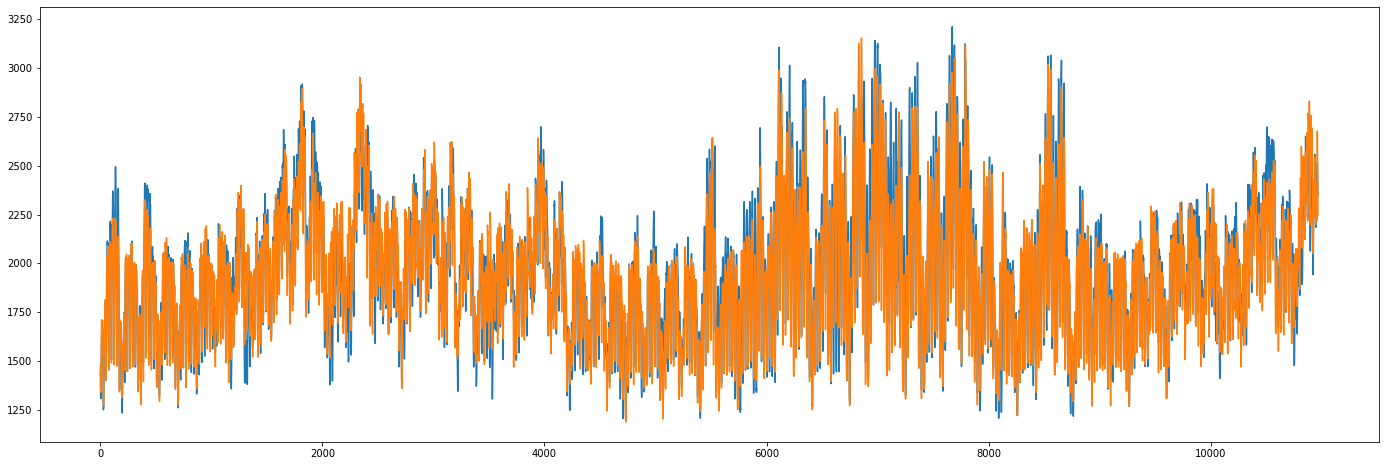

In [42]:
fig = plt.figure(figsize=(24,8))
plt.plot(denorm_data['actual'])
plt.plot(denorm_data['prediction'])